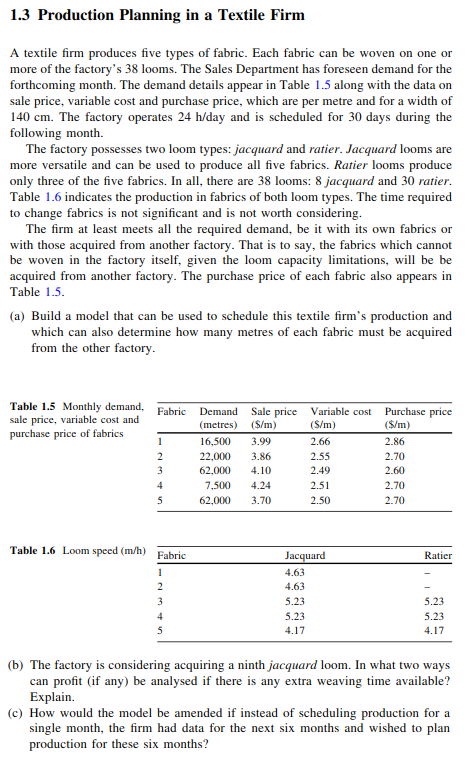

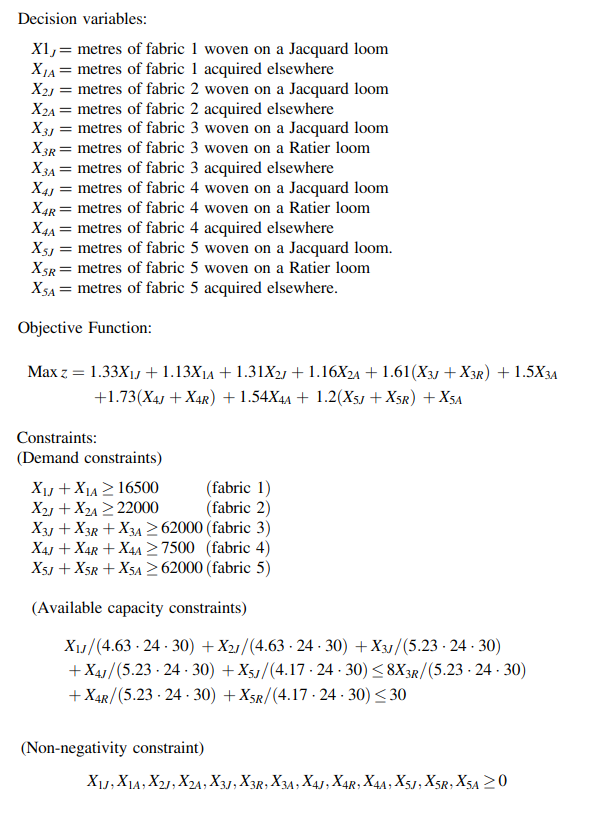

To make it more coherent with the other Colab and solvable, we will:
- Include the variables x1r and x2r, even though they are 0.
- Change the >= in the demand constraints for <=; if not, there won't be a feasible solution but manufacturing the amount of fabric we can and buy the rest (until infinity), as there is a small profit even if we sell the fabric we just buy to another factory.

In [ ]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [ ]:
#Defining the model

model = pyo.ConcreteModel()

In [ ]:
#Decision variables

model.x1j=pyo.Var(within=pyo.NonNegativeReals)
x1j=model.x1j

model.x1r=pyo.Var(within=pyo.NonNegativeReals)
x1r=model.x1r

model.x1a=pyo.Var(within=pyo.NonNegativeReals)
x1a=model.x1a


model.x2j=pyo.Var(within=pyo.NonNegativeReals)
x2j=model.x2j

model.x2r=pyo.Var(within=pyo.NonNegativeReals)
x2r=model.x2r

model.x2a=pyo.Var(within=pyo.NonNegativeReals)
x2a=model.x2a


model.x3j=pyo.Var(within=pyo.NonNegativeReals)
x3j=model.x3j

model.x3r=pyo.Var(within=pyo.NonNegativeReals)
x3r=model.x3r

model.x3a=pyo.Var(within=pyo.NonNegativeReals)
x3a=model.x3a


model.x4j=pyo.Var(within=pyo.NonNegativeReals)
x4j=model.x4j

model.x4r=pyo.Var(within=pyo.NonNegativeReals)
x4r=model.x4r

model.x4a=pyo.Var(within=pyo.NonNegativeReals)
x4a=model.x4a


model.x5j=pyo.Var(within=pyo.NonNegativeReals)
x5j=model.x5j

model.x5r=pyo.Var(within=pyo.NonNegativeReals)
x5r=model.x5r

model.x5a=pyo.Var(within=pyo.NonNegativeReals)
x5a=model.x5a

In [ ]:
#Objective rule and constraints

model.Obj = pyo.Objective(expr=(3.99-2.66)*(x1j+x1r)+(3.99-2.86)*x1a+
                                (3.86-2.55)*(x2j+x2r)+(3.86-2.70)*x2a+
                                (4.10-2.49)*(x3j+x3r)+(4.10-2.60)*x3a+
                                (4.24-2.51)*(x4j+x4r)+(4.24-2.70)*x4a+
                                (3.70-2.50)*(x5j+x5r)+(3.70-2.70)*x5a, sense = pyo.maximize)
model.Const1 = pyo.Constraint(expr=x1j+x1r+x1a<=16500)
model.Const2 = pyo.Constraint(expr=x2j+x2r+x2a<=22000)
model.Const3 = pyo.Constraint(expr=x3j+x3r+x3a<=62000)
model.Const4 = pyo.Constraint(expr=x4j+x4r+x4a<=7500)
model.Const5 = pyo.Constraint(expr=x5j+x5r+x5a<=62000)
model.Const6 = pyo.Constraint(expr=x1j/4.63+x2j/4.63+x3j/5.23+x4j/5.23+x5j/4.17<=8*24*30)
model.Const7 = pyo.Constraint(expr=x3r/5.23+x4r/5.23+x5r/4.17<=30*24*30)
model.Const8 = pyo.Constraint(expr=x1r==0)
model.Const9 = pyo.Constraint(expr=x2r==0)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
optm = SolverFactory('glpk')
results=optm.solve(model)

In [ ]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 232413.178896882
  Upper bound: 232413.178896882
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 15
  Number of nonzeros: 25
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0050737857818603516
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
print("objective function: ", model.Obj())
print('Fabric 1 in jaccard machine: ',x1j(), ' m')
print('Fabric 1 in ratier machine: ',x1r(), ' m')
print('Fabric 1 purchased outside: ',x1a(), ' m')
print('Fabric 2 in jaccard machine: ',x2j(), ' m')
print('Fabric 2 in ratier machine: ',x2r(), ' m')
print('Fabric 2 purchased outside: ',x2a(), ' m')
print('Fabric 3 in jaccard machine: ',x3j(), ' m')
print('Fabric 3 in ratier machine: ',x3r(), ' m')
print('Fabric 3 purchased outside: ',x3a(), ' m')
print('Fabric 4 in jaccard machine: ',x4j(), ' m')
print('Fabric 4 in ratier machine: ',x4r(), ' m')
print('Fabric 4 purchased outside: ',x4a(), ' m')
print('Fabric 5 in jaccard machine: ',x5j(), ' m')
print('Fabric 5 in ratier machine: ',x5r(), ' m')
print('Fabric 5 purchased outside: ',x5a(), ' m')

objective function:  232413.17889688245
Fabric 1 in jaccard machine:  16500.0  m
Fabric 1 in ratier machine:  0.0  m
Fabric 1 purchased outside:  0.0  m
Fabric 2 in jaccard machine:  10168.8  m
Fabric 2 in ratier machine:  0.0  m
Fabric 2 purchased outside:  11831.2  m
Fabric 3 in jaccard machine:  0.0  m
Fabric 3 in ratier machine:  27707.8081534772  m
Fabric 3 purchased outside:  34292.1918465228  m
Fabric 4 in jaccard machine:  0.0  m
Fabric 4 in ratier machine:  7500.0  m
Fabric 4 purchased outside:  0.0  m
Fabric 5 in jaccard machine:  0.0  m
Fabric 5 in ratier machine:  62000.0  m
Fabric 5 purchased outside:  0.0  m
